# **Bart Project**

<img src="images/bart-map.png">

## Data Analytics Questions

- **Which BART station is the busiest?**
- **What is the least popular BART route?**
- **When is the best time to go to SF from Berkeley if you want to find a seat?**
- **Which day of the week is the busiest?**
- **How many people take the BART late at night?**

---

## Data Science Questions

### Question A: 
**Compute the straight line distance between every station.**

### Question B: 
**Build a model that can predict the number of people commuting to work by BART between any 2 stations:**

- How would you approach that?
- What additional data would you need?
- How would you want the city or BART officials to use your data?

---

## Data Preparation

1. **Append the two ridership files for 2016 and 2017.**
2. **Merge the station data file.**
3. **Answer the data analytics questions.**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', 100)

## Importing Data

In [2]:
df2016 = pd.read_csv('data/date-hour-soo-dest-2016.csv')
df2017 = pd.read_csv('data/date-hour-soo-dest-2017.csv')
station = pd.read_csv('data/station_info.csv')

In [3]:
df2016.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [4]:
df2017.head()

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00
1,12TH,24TH,2,2017-01-01 00:00:00
2,12TH,BAYF,1,2017-01-01 00:00:00
3,12TH,CIVC,5,2017-01-01 00:00:00
4,12TH,COLS,2,2017-01-01 00:00:00


In [5]:
station.head()

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)


In [6]:
# concat 2016 and 2017 data
df = pd.concat([df2016, df2017])

In [7]:
df.shape

(13285207, 4)

In [8]:
df['Origin'].nunique() 

46

In [9]:
station.nunique()

Abbreviation    46
Description     46
Location        46
Name            46
dtype: int64

In [10]:
station['Abbreviation'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLS', 'COLM', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WARM', 'WCRK', 'WDUB', 'WOAK'], dtype=object)

In [11]:
df['Origin'].unique()   

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK', 'WSPR'], dtype=object)

In [12]:
df[df['Origin'] == 'WSPR']

,Origin,Destination,Throughput,DateTime
4794211,WSPR,LAKE,1,2016-06-23 20:00:00
6115834,WSPR,WSPR,1,2016-08-11 12:00:00
6118795,WSPR,LAKE,1,2016-08-11 14:00:00
6273145,WSPR,WSPR,1,2016-08-17 11:00:00
6301054,WSPR,WSPR,1,2016-08-18 10:00:00
...,...,...,...,...
3313620,WSPR,MONT,1,2017-05-03 23:00:00
3313621,WSPR,NBRK,1,2017-05-03 23:00:00
3313622,WSPR,NCON,1,2017-05-03 23:00:00
3313623,WSPR,SANL,2,2017-05-03 23:00:00


In [13]:
df['Origin'] = df['Origin'].replace('WSPR', 'WARM')

In [14]:
df.sample(5)

,Origin,Destination,Throughput,DateTime
1160258,GLEN,COLS,1,2017-02-14 06:00:00
9740703,SSAN,NCON,1,2016-12-22 16:00:00
3747965,DBRK,SFIA,9,2016-05-17 05:00:00
8422979,16TH,BAYF,3,2016-11-03 22:00:00
2204956,ROCK,PITT,3,2017-03-24 14:00:00


In [15]:
df.columns

Index(['Origin', 'Destination', 'Throughput', 'DateTime'], dtype='object')

In [16]:
# I got this code from Kaggle.
df['DateTime']=pd.to_datetime(df['DateTime'])
df['Year']=df['DateTime'].dt.year
df['Month']=df['DateTime'].dt.month
df['Weekday']=df['DateTime'].dt.dayofweek
df['Month_Name']=df['DateTime'].dt.month_name()
df['Weekday_Name']=df['DateTime'].dt.day_name()
df['Hour'] = df['DateTime'].dt.hour

df=df.drop('DateTime',axis=1)
df.sample(5)

,Origin,Destination,Throughput,Year,Month,Weekday,Month_Name,Weekday_Name,Hour
9575608,ASHB,RICH,15,2016,12,4,December,Friday,15
8021885,ROCK,SBRN,1,2016,10,3,October,Thursday,11
106412,WDUB,PLZA,1,2016,1,1,January,Tuesday,12
2576168,DALY,ASHB,1,2017,4,4,April,Friday,5
3250838,DBRK,SBRN,1,2016,4,3,April,Thursday,22


# <span style="color:red">Data Analytics</span>

## Busiest Station

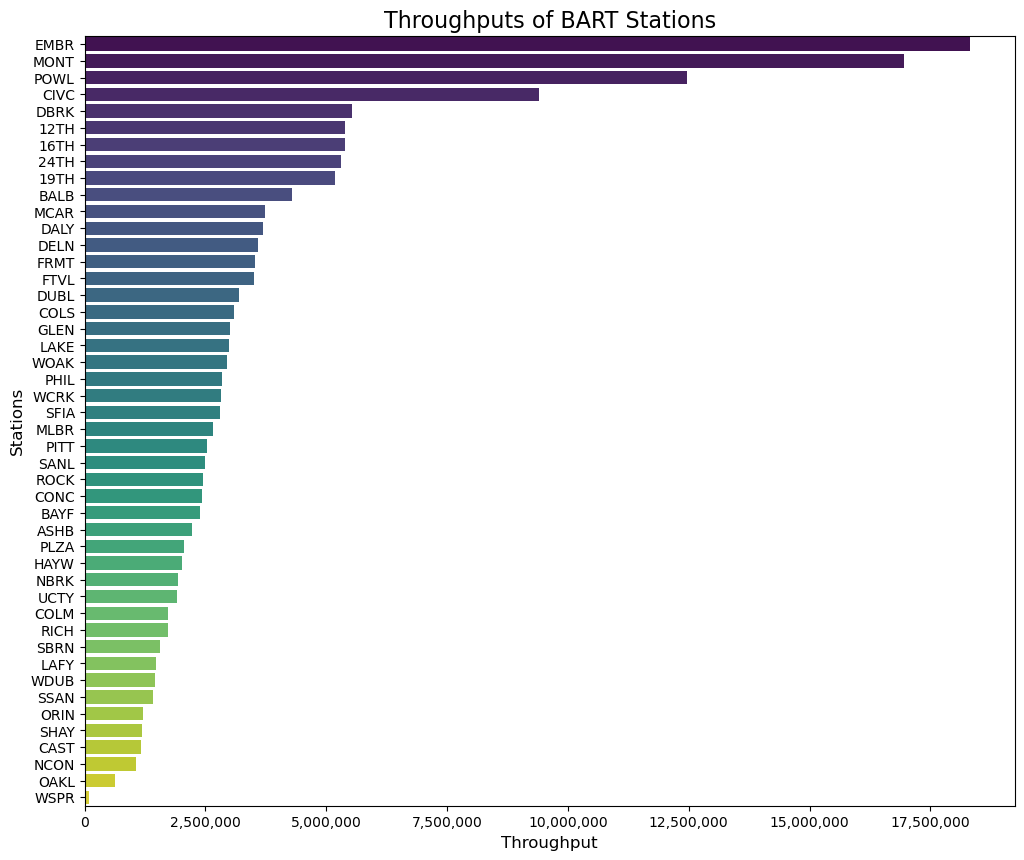

In [17]:
station_throughput = df.groupby('Destination')['Throughput'].sum().reset_index()
station_throughput = station_throughput.sort_values(by='Throughput', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Throughput', y='Destination', data=station_throughput, palette='viridis') 
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # I got this code from GPT
plt.title('Throughputs of BART Stations', fontsize=16)
plt.xlabel('Throughput', fontsize=12)
plt.ylabel('Stations', fontsize=12);


In [18]:
most_busy_station = df.groupby('Destination')['Throughput'].sum().idxmax()
most_busy_value = df.groupby('Destination')['Throughput'].sum().max()

print(f"Busiest station: {most_busy_station}, Throughput: {most_busy_value}")

Busiest station: EMBR, Throughput: 18327187


## Least Popular BART Route

In [19]:
df['Route'] = df['Origin'] + ' - ' + df['Destination']

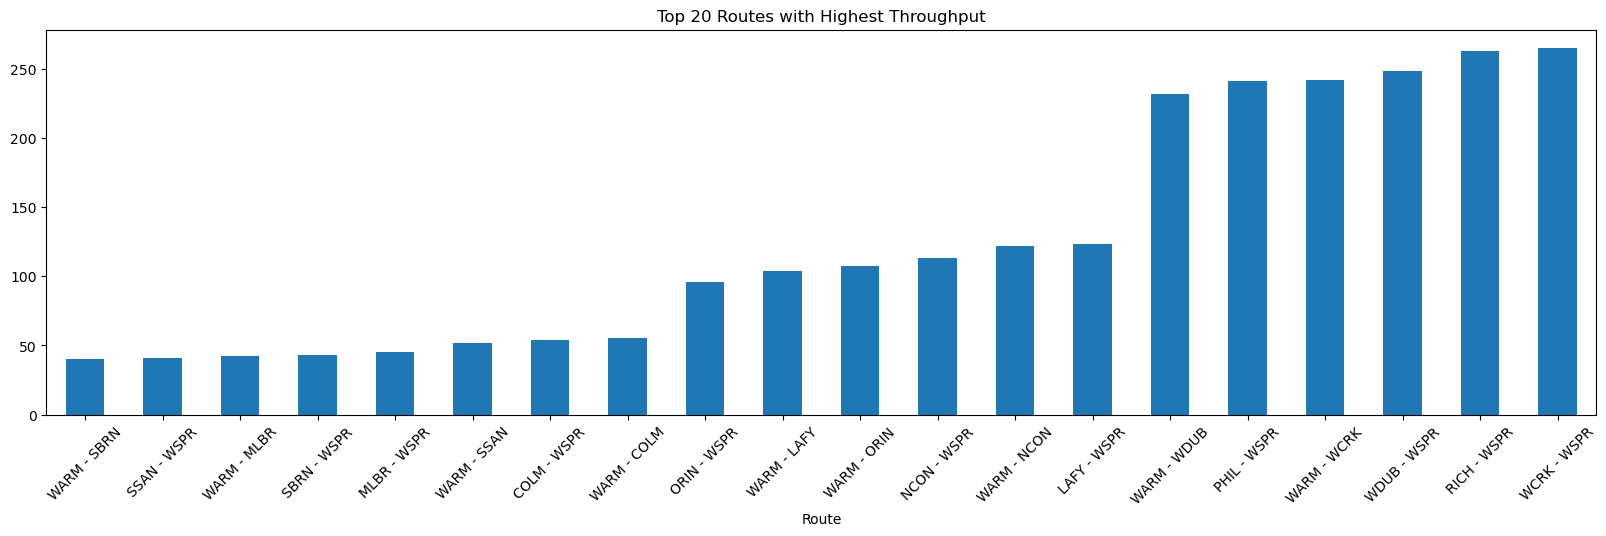

In [20]:
plt.figure(figsize=(20,5))
df.groupby('Route')['Throughput'].sum().sort_values(ascending=True)[:20].plot.bar()
plt.title('Top 20 Routes with Highest Throughput')
plt.xticks(rotation=45);

In [21]:
least_popular_route = df.groupby('Route')['Throughput'].sum().sort_values(ascending=True).idxmin()

least_throughput = df.groupby('Route')['Throughput'].sum().sort_values(ascending=True).min()

print(f"Least popular route: {least_popular_route}, Throughput: {least_throughput}")

Least popular route: WARM - SBRN, Throughput: 40


## When is the best time to go to SF from Berkeley if you want to find a seat?

### DBRK -> SSAN

In [22]:
df[(df['Origin']=='DBRK') & (df['Destination']=='SSAN')].groupby(['Weekday_Name','Hour'])['Throughput'].sum().sort_values(ascending=True)[0:1]

Weekday_Name  Hour
Thursday      1       1
Name: Throughput, dtype: int64

Best time to go to SF from Berkeley: 1am on Thursday

## Busiest Day Of The Week

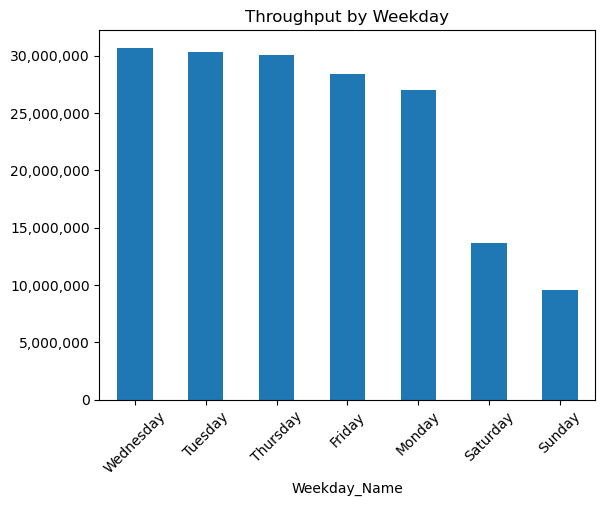

In [23]:
df.groupby('Weekday_Name')['Throughput'].sum().sort_values(ascending=False).plot.bar()
plt.title('Throughput by Weekday')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # I got this code from GPT
plt.xticks(rotation=45);

In [24]:
busiest_day = df.groupby('Weekday_Name')['Throughput'].sum().sort_values(ascending=False).idxmax()
busiest_day_throughput = df.groupby('Weekday_Name')['Throughput'].sum().sort_values(ascending=False).max()

print(f"Busiest day: {busiest_day}, Throughput: {busiest_day_throughput}")

Busiest day: Wednesday, Throughput: 30677189


## How many people take the BART late at night?

In [25]:
late_throughput = df[(df['Hour'] > 0) & (df['Hour'] <= 5)]['Throughput'].sum() # I got this code from Kaggle

print(f"Late night throughput: {late_throughput}")

Late night throughput: 2378622


# <span style="color:red">Data Science</span>

## Distance Between Each Station

In [26]:
station.head()

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)


In [27]:
station['longitude'] = station.Location.apply(lambda x: float(x.split(',')[0]))
station['latitude'] = station.Location.apply(lambda x: float(x.split(',')[1]))

In [28]:
station.head()

,Abbreviation,Description,Location,Name,longitude,latitude
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH),-122.271450,37.803768
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH),-122.419694,37.765062
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH),-122.268602,37.808350
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH),-122.418143,37.752470
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB),-122.270062,37.852803


In [29]:
stationsA=station[["Abbreviation","latitude","longitude"]]
stationsB=station[["Abbreviation","latitude","longitude"]]

In [30]:
stationsA[["longitude","latitude"]]=stationsA[["longitude","latitude"]].astype("float")
stationsB[["longitude","latitude"]]=stationsB[["longitude","latitude"]].astype("float")

In [31]:

stationsA[['lat_radians_A','long_radians_A']] = np.radians(stationsA[['latitude','longitude']])
stationsB[['lat_radians_B','long_radians_B']] = np.radians(stationsB[['latitude','longitude']])

In [32]:
stationsA.head()

,Abbreviation,latitude,longitude,lat_radians_A,long_radians_A
0,12TH,37.803768,-122.271450,0.659800,-2.134039
1,16TH,37.765062,-122.419694,0.659125,-2.136627
2,19TH,37.808350,-122.268602,0.659880,-2.133990
3,24TH,37.752470,-122.418143,0.658905,-2.136600
4,ASHB,37.852803,-122.270062,0.660656,-2.134015


In [33]:
import sklearn
from sklearn import neighbors

dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise(stationsA[['lat_radians_A','long_radians_A']],stationsB[['lat_radians_B','long_radians_B']])*6371) # 6371 is the radius of the earth in kilometers
df_dist_matrix = (pd.DataFrame(dist_matrix,index=stationsA['Abbreviation'], columns=stationsB['Abbreviation']))

In [34]:
df_dist_matrix

Abbreviation,12TH,16TH,19TH,24TH,ASHB,BALB,BAYF,CAST,CIVC,COLS,COLM,CONC,DALY,DBRK,DELN,DUBL,EMBR,FRMT,FTVL,GLEN,HAYW,LAFY,LAKE,MCAR,MLBR,MONT,NBRK,NCON,OAKL,ORIN,PHIL,PITT,PLZA,POWL,RICH,ROCK,SANL,SBRN,SFIA,SHAY,SSAN,UCTY,WARM,WCRK,WDUB,WOAK
Abbreviation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12TH,0.000000,13.720175,0.567617,14.097927,5.453806,17.972899,17.421986,21.318066,12.818548,8.602724,21.651800,28.452150,20.488348,7.381976,14.064957,34.641522,11.099285,37.726994,5.254274,16.294042,22.027147,16.279546,0.930228,2.839447,24.795767,11.500185,7.876464,30.993614,11.334582,11.315857,23.450324,37.305931,11.254330,12.186511,16.442537,4.881371,13.315746,22.428251,23.437267,26.644817,21.698728,32.578345,44.493097,21.179219,32.315075,2.084928
16TH,13.720175,0.000000,14.123076,1.406790,16.370223,5.417745,26.873362,31.369785,1.703137,19.629420,9.834954,41.399854,7.862292,17.710613,19.956444,46.313509,3.678977,45.322092,17.219854,3.768466,31.123107,29.571877,14.036737,15.184031,18.552504,3.163421,17.025981,43.624344,19.134809,24.249960,36.740696,50.306911,18.615264,2.391407,19.977128,17.236833,23.259691,14.158399,16.751655,35.047867,11.411739,40.370112,51.419301,34.647001,43.824988,11.806930
19TH,0.567617,14.123076,0.000000,14.537177,4.944611,18.449743,17.594397,21.423040,13.176704,8.759155,22.162579,27.927226,20.972364,6.866855,13.652407,34.575547,11.413346,37.927682,5.396993,16.761912,22.193837,15.772063,1.294459,2.307486,25.363052,11.827735,7.411705,30.454558,11.680862,10.773359,22.948482,36.787537,10.815966,12.530541,16.099056,4.316179,13.491787,22.989786,24.004818,26.832791,22.238484,32.780913,44.714838,20.697326,32.267711,2.363310
24TH,14.097927,1.406790,14.537177,0.000000,17.138578,4.296647,26.382151,30.899845,3.051922,19.454198,8.647687,42.092373,6.828586,18.567582,21.157028,45.989716,4.861216,44.508828,17.231066,2.560421,30.546688,30.156601,14.327988,15.774585,17.148474,4.372678,17.959316,44.384429,18.629589,24.894688,37.339178,50.997728,19.709716,3.668896,21.283104,17.885535,22.878946,12.756104,15.346553,34.367219,10.069632,39.597423,50.525350,35.183337,43.483323,12.280671
ASHB,5.453806,16.370223,4.944611,17.138578,0.000000,21.355016,21.438504,24.836544,15.038489,12.762538,25.435815,25.053770,23.915627,1.931222,9.023275,36.672412,12.990622,41.772579,9.560819,19.604034,25.948929,13.531585,6.216814,2.652851,29.895394,13.494601,2.630089,27.257098,16.331015,8.088818,20.581818,33.957113,6.091619,14.299741,11.850630,1.872092,17.430801,27.148960,28.448090,30.663606,25.948183,36.657191,48.655719,18.717531,34.527755,5.766857
BALB,17.972899,5.417745,18.449743,4.296647,21.355016,0.000000,28.370186,32.896601,7.100637,22.326582,4.426359,46.215044,2.560946,22.828351,25.374187,48.284910,9.084916,45.301700,20.509238,1.754601,32.237574,34.185441,18.090735,19.859788,14.512558,8.575488,22.246533,48.564235,20.718954,28.995894,41.370956,55.112936,23.993534,7.808705,25.332068,22.011712,25.213150,9.717283,12.706137,35.692841,6.383547,40.567612,50.980852,39.147064,45.742854,16.283721
BAYF,17.421986,26.873362,17.594397,26.382151,21.438504,28.370186,0.000000,4.531980,26.914792,8.836838,29.923394,31.947031,30.155769,22.928463,30.382150,20.008136,26.068034,20.365540,12.198752,27.328128,4.607425,21.822855,16.508945,19.196143,25.303058,26.239989,24.035914,35.210338,7.752571,20.793251,26.480943,39.184309,27.433911,26.594946,33.285280,19.759903,4.106354,26.340207,25.078559,9.252500,28.171545,15.232015,27.220506,23.766972,17.447384,19.075498
CAST,21.318066,31.369785,21.423040,30.899845,24.836544,32.896601,4.531980,0.000000,31.370282,12.755491,34.380122,31.731127,34.661193,26.154416,33.585225,15.570095,30.458562,17.194416,16.066778,31.860095,2.544392,22.917755,20.433426,22.798554,29.179789,30.649412,27.362164,35.029355,12.274283,22.926198,26.489444,38.245665,30.660487,31.029730,36.648450,23.060080,8.262625,30.561191,29.103355,6.474328,32.551621,12.255757,24.163189,23.892538,13.004394,23.100389
CIVC,12.818548,1.703137,13.176704,3.051922,15.038489,7.10

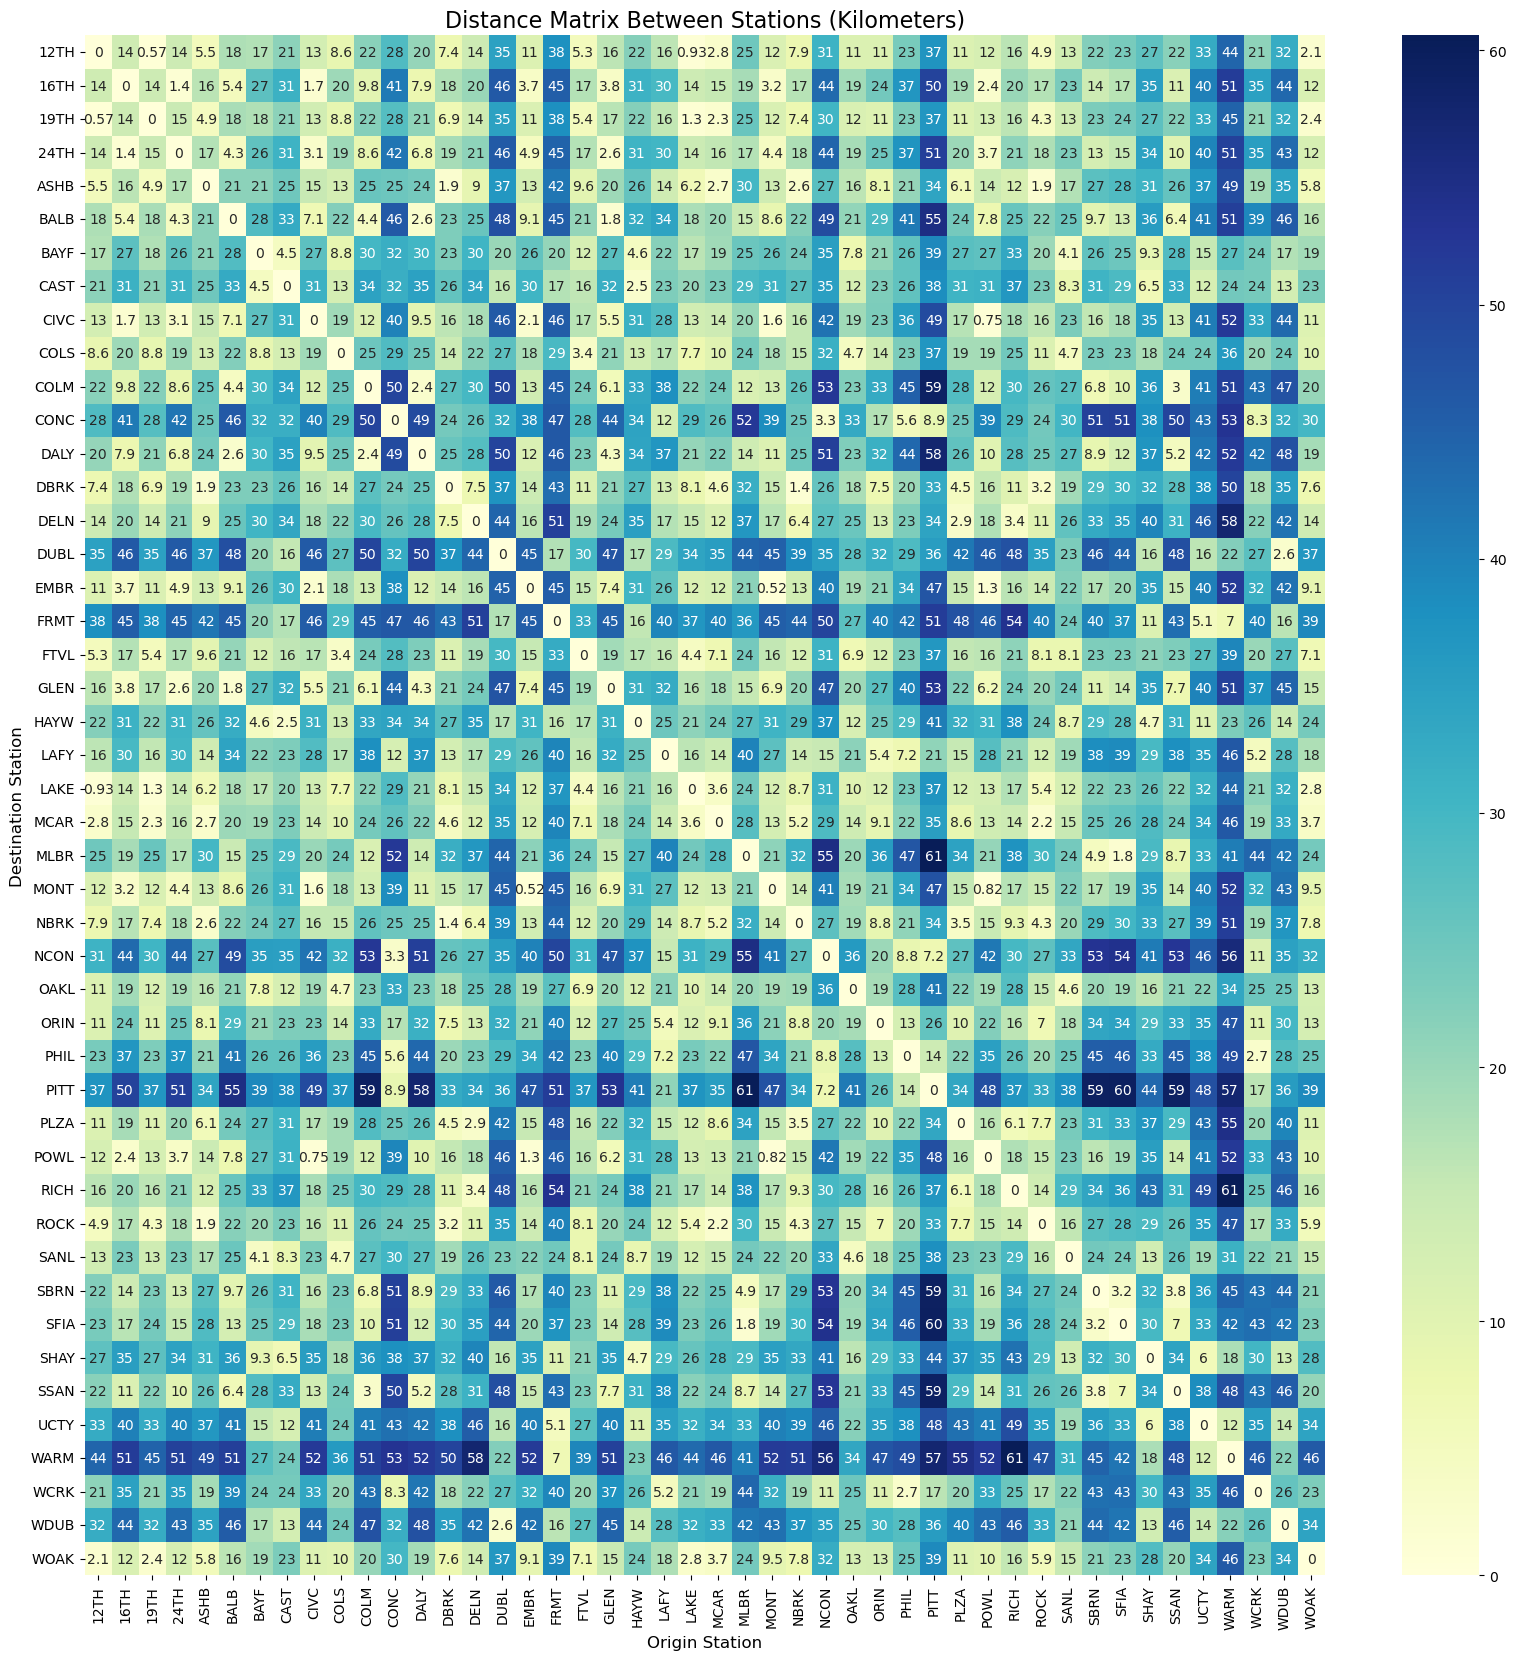

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(df_dist_matrix, cmap='YlGnBu', annot=True)

plt.title('Distance Matrix Between Stations (Kilometers)', fontsize=16)
plt.xlabel('Origin Station', fontsize=12)
plt.ylabel('Destination Station', fontsize=12);


## A Model That Can Predict the Number of People Commuting on BART Between Two Stations

In [36]:
df.sample(5)

,Origin,Destination,Throughput,Year,Month,Weekday,Month_Name,Weekday_Name,Hour,Route
3002843,CIVC,WOAK,26,2017,4,5,April,Saturday,20,CIVC - WOAK
8207717,PITT,LAFY,3,2016,10,3,October,Thursday,6,PITT - LAFY
4992193,24TH,NBRK,2,2016,6,3,June,Thursday,23,24TH - NBRK
2736567,POWL,CIVC,13,2017,4,3,April,Thursday,8,POWL - CIVC
2279532,12TH,ORIN,8,2016,3,3,March,Thursday,15,12TH - ORIN


In [37]:
df.isnull().sum()   

Origin          0
Destination     0
Throughput      0
Year            0
Month           0
Weekday         0
Month_Name      0
Weekday_Name    0
Hour            0
Route           0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13285207 entries, 0 to 3313624
Data columns (total 10 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Origin        object
 1   Destination   object
 2   Throughput    int64 
 3   Year          int32 
 4   Month         int32 
 5   Weekday       int32 
 6   Month_Name    object
 7   Weekday_Name  object
 8   Hour          int32 
 9   Route         object
dtypes: int32(4), int64(1), object(5)
memory usage: 912.2+ MB


In [39]:
df= df[df.Weekday<=4] # Weekday

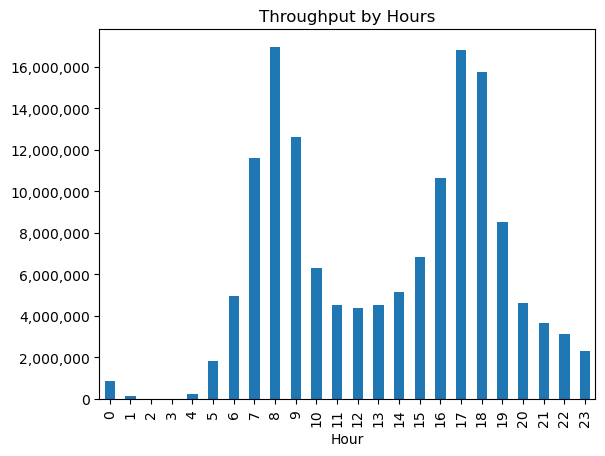

In [40]:
df.groupby('Hour')['Throughput'].sum().sort_index(ascending=True).plot.bar()
plt.title('Throughput by Hours')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))));

In [41]:
df['Is_Rush_Hour'] = df['Hour'].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 19 else 0)


In [42]:
df.sample(10)

,Origin,Destination,Throughput,Year,Month,Weekday,Month_Name,Weekday_Name,Hour,Route,Is_Rush_Hour
4733247,WDUB,PHIL,1,2016,6,1,June,Tuesday,19,WDUB - PHIL,1
2776942,FRMT,NCON,1,2016,4,0,April,Monday,22,FRMT - NCON,0
9911339,POWL,POWL,21,2016,12,3,December,Thursday,16,POWL - POWL,1
539532,MCAR,12TH,4,2016,1,3,January,Thursday,13,MCAR - 12TH,0
7658871,FTVL,GLEN,21,2016,10,4,October,Friday,7,FTVL - GLEN,1
7017994,PITT,12TH,3,2016,9,2,September,Wednesday,4,PITT - 12TH,0
511992,LAKE,24TH,9,2017,1,4,January,Friday,18,LAKE - 24TH,1
2572003,LAFY,19TH,1,2017,4,3,April,Thursday,21,LAFY - 19TH,0
3569608,SHAY,NBRK,1,2016,5,1,May,Tuesday,16,SHAY - NBRK,1
4974782,SFIA,WOAK,8,2016,6,3,June,Thursday,11,SFIA - WOAK,0


In [43]:
x = df.drop(['Throughput', 'Route'], axis=1)
y = df['Throughput']

In [44]:
x = pd.get_dummies(x, drop_first=True)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [47]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 1076.8305295774232
R2 Score: 0.22192573748720912


In [48]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [49]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 237.00654924254857
R2 Score: 0.828748636904858
